In [25]:
import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [27]:
# Converter Parameters
Vo = 14.5
D = 0.5
fsw = 100e3

In [28]:
# Core Parameters
cores = {
    'RM8 (N87)': {
        'Bmax': 300e-3,
        'Amin': 55e-6,
        'AL': 3300e-9
    },
    'E4012 (CF196)': {
        'Bmax': 350e-3,
        'Amin': 136.8e-6,
        'AL': 4000e-9
    },
    'E4221 (N87)': {
        'Bmax': 300e-3,
        'Amin': 229e-6,
        'AL': 5200e-9
    }, 
    'E5521 (N27)': {
        'Bmax': 350e-3,
        'Amin': 351e-6,
        'AL': 5800e-9 
    }
}

In [29]:
# Core Parameters
core = 'RM8 (N87)'
Bmax = cores[core]['Bmax']
Amin = cores[core]['Amin']
AL = cores[core]['AL']

In [30]:
N_MIN = 1
N_MAX = 100 
N = np.linspace(N_MIN, N_MAX, N_MAX - N_MIN + 1)

In [31]:
Iomax = ((Bmax * Amin) / (N * AL)) - ((Vo * (1-D))/(2 * (N**2) * fsw * AL))

In [32]:
Iomin = (Vo * (1-D)) / (2 * fsw * (N**2) * AL)

In [33]:
Iovalid = Iomax[Iomax > Iomin]
Io = Iovalid.max()
Nopt = N[np.where(Iomax == Io)]

In [34]:
print(f'Best choice at N = {Nopt} obtains Io = {np.round(Io * 1e3, 3)} mA')

Best choice at N = [5.] obtains Io = 560.606 mA


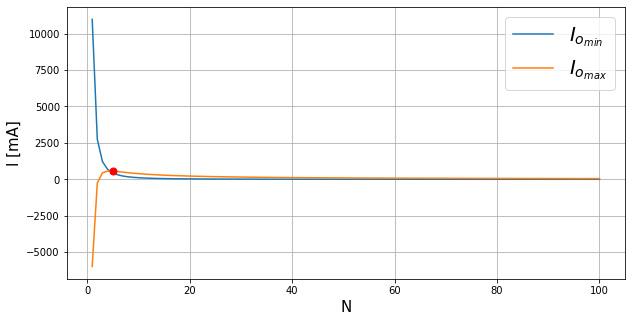

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(N, Iomin * 1e3, label='$I_{o_{min}}$')
plt.plot(N, Iomax * 1e3, label='$I_{o_{max}}$')
plt.plot(Nopt, Io * 1e3, marker='o', markersize=7, color='red')
plt.ylabel('I [mA]', fontsize=15)
plt.xlabel('N', fontsize=15)
plt.legend(fontsize=20)
plt.grid()
plt.show()

In [36]:
Nchoice = 40
Iomaxchoice = Iomax[np.where(N == Nchoice)]
Iominchoice = Iomin[np.where(N == Nchoice)]

print(f'Choice: N = {Nchoice} - Iomin = {np.round(Iominchoice * 1e3, 3)} mA - Iomax = {np.round(Iomaxchoice * 1e3, 3)} mA')

Choice: N = 40 - Iomin = [6.866] mA - Iomax = [118.134] mA
